In [ ]:
import os
import zipfile
from google.colab import drive

drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/FER2/archive.zip'

TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

if not os.path.exists(TRAIN_DIR):
    if os.path.exists(zip_path):
        print("Found zip file at:", zip_path)
        print("Unzipping dataset... this may take 1-2 minutes.")

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall('/content')

        print("Unzipping complete! Folders in /content:", os.listdir('/content'))
    else:
        print(f"!!! ERROR: Zip file not found at {zip_path}. Check your Drive path.")
else:
    print("Dataset already exists in /content/train. Skipping unzip.")


Mounted at /content/drive
Found zip file at: /content/drive/MyDrive/FER2/archive.zip
Unzipping dataset... this may take 1-2 minutes.
Unzipping complete! Folders in /content: ['.config', 'train', 'drive', 'test', 'sample_data']


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Starting Training...
Epoch 1/80


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2158 - loss: 2.0889 - End of epoch 1 | learning_rate: 0.001000
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 128ms/step - accuracy: 0.2158 - loss: 2.0886 - val_accuracy: 0.2542 - val_loss: 1.8432
Epoch 2/80
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2848 - loss: 1.8422 - End of epoch 2 | learning_rate: 0.000998
449/449 ━━━━━━━━━━━━━━━━━━━━ 38s 84ms/step - accuracy: 0.2849 - loss: 1.8421 - val_accuracy: 0.3543 - val_loss: 1.8945
Epoch 3/80
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4126 - loss: 1.5749 - End of epoch 3 | learning_rate: 0.000997
449/449 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.4126 - loss: 1.5748 - val_accuracy: 0.4411 - val_loss: 1.6197
Epoch 4/80
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4783 - loss: 1.3921 - End of epoch 4 | learning_rate: 0.000994
449/449 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.4783 - loss: 1.3921 - val_accuracy: 0.4850 - val_loss: 1.3664
Epoch 5/80
44

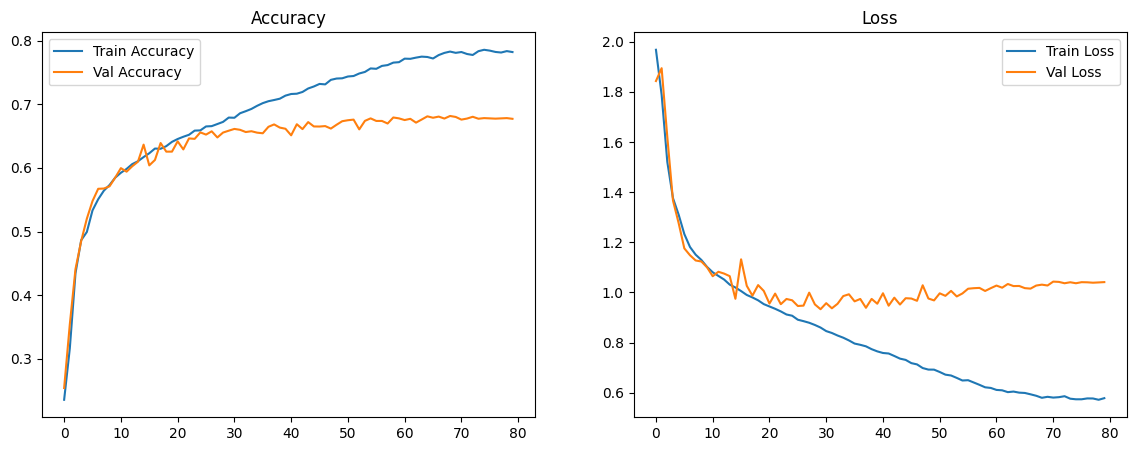


--- Running Final 15-Round TTA ---
Found 7178 images belonging to 7 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step

>>> FINAL VALIDATION ACCURACY WITH 15-ROUND TTA: 70.83% <<<


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay
import numpy as np
import matplotlib.pyplot as plt
import os

BATCH_SIZE = 64
IMG_SIZE = (48, 48)
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    color_mode='grayscale', class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    color_mode='grayscale', class_mode='categorical', shuffle=False
)
EPOCHS = 80

class LRTraker(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        if callable(lr):
            current_lr = lr(self.model.optimizer.iterations)
        else:
            current_lr = lr
        print(f" - End of epoch {epoch+1} | learning_rate: {float(current_lr):.6f}")

def build_leaky_resnet():
    inputs = layers.Input(shape=(48, 48, 1))
    x = layers.Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x); x = layers.LeakyReLU(alpha=0.1)(x)

    def res_se_block(it, f):
        sc = layers.Conv2D(f, 1, padding='same')(it) if it.shape[-1] != f else it
        x = layers.Conv2D(f, 3, padding='same', kernel_initializer='he_normal')(it)
        x = layers.BatchNormalization()(x); x = layers.LeakyReLU(0.1)(x)
        x = layers.Conv2D(f, 3, padding='same')(x); x = layers.BatchNormalization()(x)

        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Reshape((1, 1, f))(se)
        se = layers.Dense(f // 16, activation='relu')(se)
        se = layers.Dense(f, activation='sigmoid')(se)
        x = layers.Multiply()([x, se])
        return layers.LeakyReLU(0.1)(layers.Add()([x, sc]))

    x = res_se_block(x, 64); x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.2)(x)
    x = res_se_block(x, 128); x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.3)(x)
    x = res_se_block(x, 256); x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.3)(x)
    x = res_se_block(x, 512); x = layers.MaxPooling2D(2)(x); x = layers.Dropout(0.4)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x); x = layers.LeakyReLU(alpha=0.1)(x); x = layers.Dropout(0.5)(x)
    return models.Model(inputs=inputs, outputs=layers.Dense(7, activation='softmax')(x))

steps_per_epoch = train_generator.samples // BATCH_SIZE
lr_schedule = CosineDecay(initial_learning_rate=1e-3, decay_steps=EPOCHS * steps_per_epoch, alpha=1e-5)

model = build_leaky_resnet()
model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ModelCheckpoint('fer_best_colab.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
    LRTraker()
]

print("Starting Training...")
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, callbacks=callbacks)

def plot_results(history):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy'); plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy'); plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss'); plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss'); plt.legend()
    plt.show()

plot_results(history)

print("\n--- Running Final 15-Round TTA ---")
tta_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
tta_gen = tta_datagen.flow_from_directory(TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, color_mode='grayscale', class_mode='categorical', shuffle=False)

preds = []
for i in range(15):
    tta_gen.reset()
    preds.append(model.predict(tta_gen, verbose=1))

final_acc = np.sum(np.argmax(np.mean(preds, axis=0), axis=1) == tta_gen.classes) / len(tta_gen.classes)
print(f"\n>>> FINAL VALIDATION ACCURACY WITH 15-ROUND TTA: {final_acc * 100:.2f}% <<<")


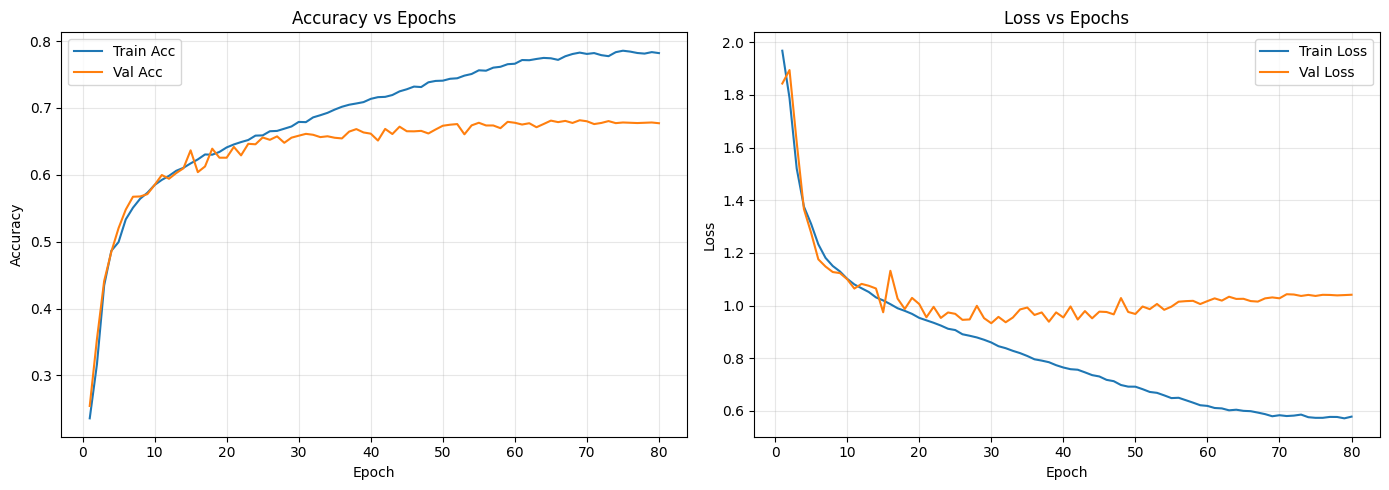

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


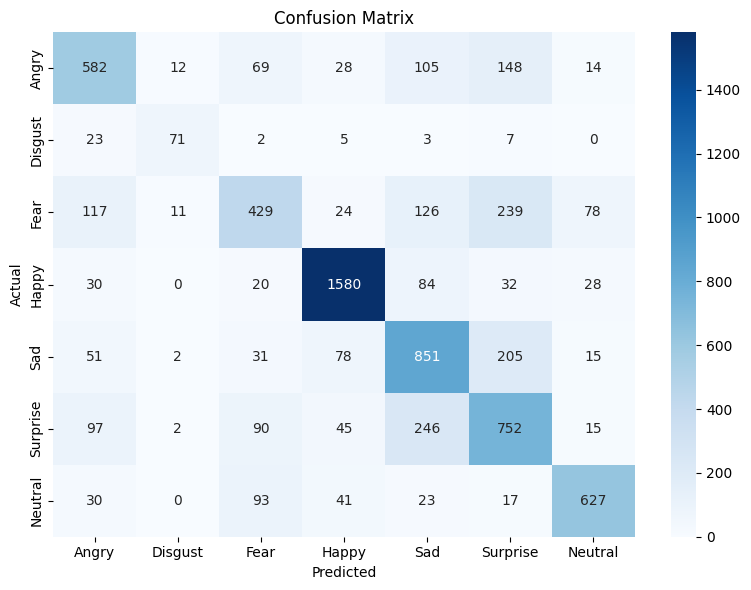


Classification report:

              precision    recall  f1-score   support

       Angry       0.63      0.61      0.62       958
     Disgust       0.72      0.64      0.68       111
        Fear       0.58      0.42      0.49      1024
       Happy       0.88      0.89      0.88      1774
         Sad       0.59      0.69      0.64      1233
    Surprise       0.54      0.60      0.57      1247
     Neutral       0.81      0.75      0.78       831

    accuracy                           0.68      7178
   macro avg       0.68      0.66      0.66      7178
weighted avg       0.68      0.68      0.68      7178



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_training_curves(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_curves(history)

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

Y_pred = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification report:\n")
print(classification_report(validation_generator.classes, y_pred,
                            target_names=emotion_labels))


Detected class folders: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry: 958 images
disgust: 111 images
fear: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprise: 831 images


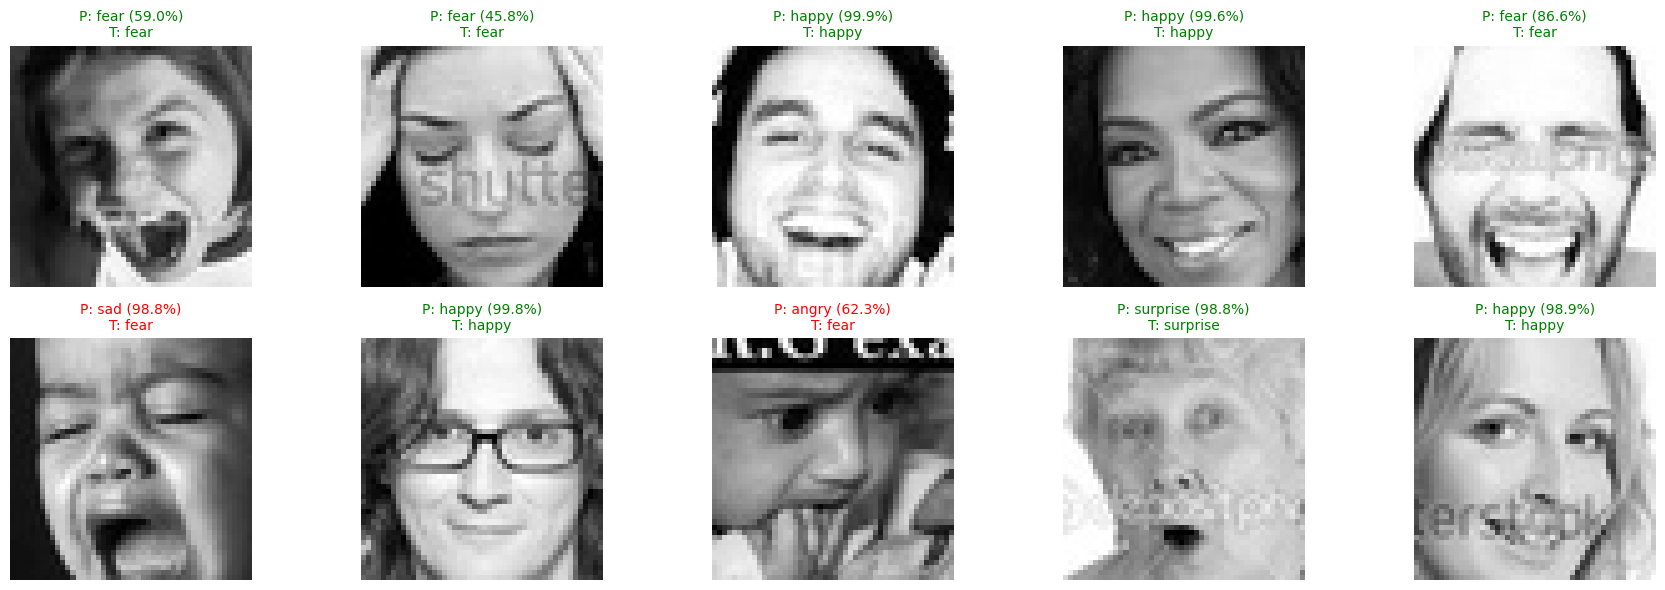

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

TEST_DIR = '/content/test'

def test_cases(model, test_dir=TEST_DIR, num_samples=10):
    class_folders = [d for d in os.listdir(test_dir)
                     if os.path.isdir(os.path.join(test_dir, d))]
    class_folders.sort()
    print("Detected class folders:", class_folders)

    all_samples = []
    for label in class_folders:
        class_dir = os.path.join(test_dir, label)
        files = [f for f in os.listdir(class_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"{label}: {len(files)} images")
        for fname in files:
            all_samples.append((os.path.join(class_dir, fname), label))

    if len(all_samples) == 0:
        raise RuntimeError(f"No images found under {test_dir}. Check that your test images are really there.")

    num_samples = min(num_samples, len(all_samples))
    samples = random.sample(all_samples, num_samples)

    plt.figure(figsize=(18, 6))
    for i, (img_path, true_label) in enumerate(samples):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Could not read:", img_path)
            continue

        img_resized = cv2.resize(img, (48, 48))
        x = img_resized.reshape(1, 48, 48, 1).astype('float32') / 255.0

        preds = model.predict(x, verbose=0)
        pred_idx = np.argmax(preds)
        pred_label = class_folders[pred_idx] if pred_idx < len(class_folders) else str(pred_idx)
        conf = float(np.max(preds) * 100)

        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"P: {pred_label} ({conf:.1f}%)\nT: {true_label}",
                  color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

test_cases(model)
